In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.tail()

,TV,radio,newspaper,sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [5]:
data.shape

(200, 4)

In [6]:
import seaborn as sns
%matplotlib inline

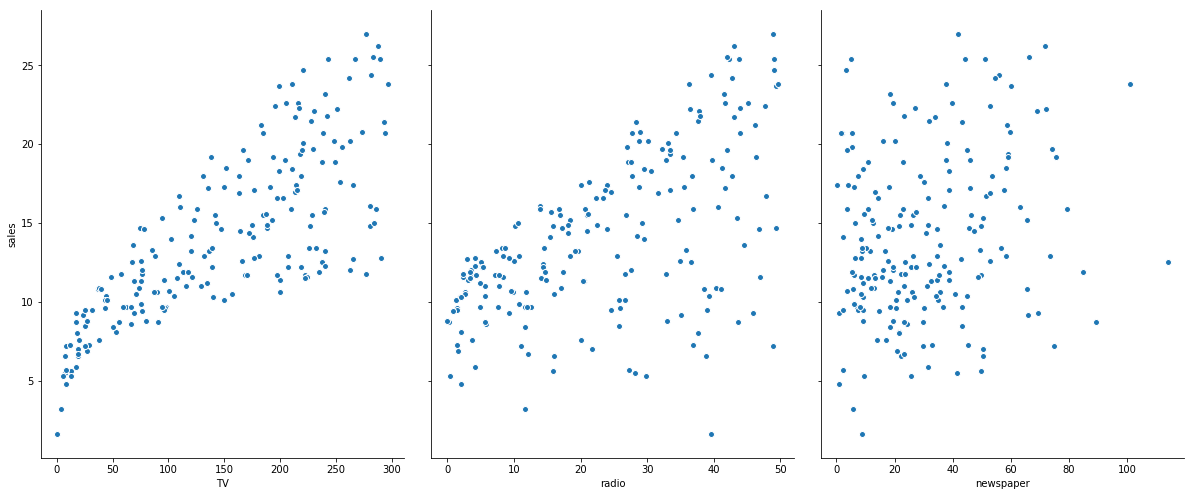

In [10]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'],y_vars='sales',size=7,aspect=0.8)

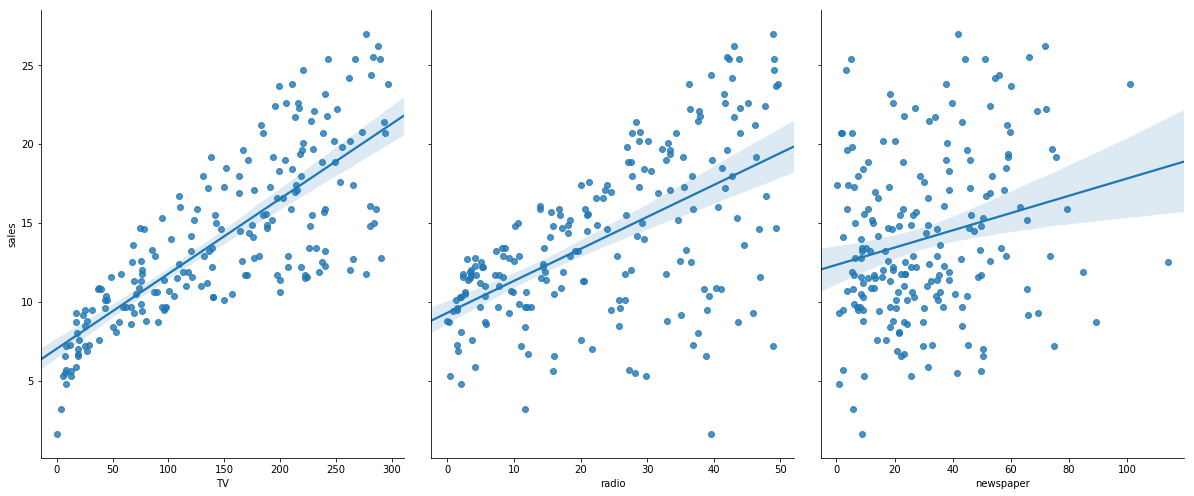

In [11]:
sns.pairplot(data, x_vars=['TV','radio','newspaper'],y_vars='sales',size=7,aspect=0.8,kind='reg')

In [13]:
feature_cols=['TV','radio','newspaper']
X=data[feature_cols]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [14]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [15]:
y=data['sales']
y=data.sales
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

In [16]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [20]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)

In [21]:
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


In [27]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print(linreg.intercept_)
print(linreg.coef_)

2.8769666223179318
[0.04656457 0.17915812 0.00345046]


In [30]:
zip(feature_cols, linreg.coef_)

In [32]:
y_pred=linreg.predict(X_test)

In [35]:
from sklearn import metrics
import numpy as np

#平均绝对误差(Mean Absolute Error, MAE)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
#均方误差(Mean Squared Error, MSE)
print("MSE: ",metrics.mean_squared_error(y_test, y_pred))
#均方根误差(Root Mean Squared Error, RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.0668917082595208
MSE:  1.9730456202283375
RMSE: 1.4046514230328953


In [36]:
feature_cols=['TV','radio']
X=data[feature_cols]
y=data['sales']
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=1)
linreg=LinearRegression()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_test)

#平均绝对误差(Mean Absolute Error, MAE)
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))
#均方误差(Mean Squared Error, MSE)
print("MSE: ",metrics.mean_squared_error(y_test, y_pred))
#均方根误差(Root Mean Squared Error, RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 1.0477590411212603
MSE:  1.926276041866742
RMSE: 1.3879034699382886
